# Hate Speech Detection in Movie Reviews




## Introduction
This notebook demonstrates the key steps and processes involved in developing an AI model for detecting hate speech in movie reviews. 

The model we have selected is the **LSTM with Attention** due to its superior performance in capturing the context and semantics of the text.


## Problem Statement

Hate speech in online movie reviews creates a toxic environment, discourages participation, and harms individuals. Identifying and moderating hate speech is crucial for maintaining a healthy online community.


## Dataset Description & Visualization
- **Contents**: 24,000+ tweets classified as:
  - 0: Hate speech
  - 1: Offensive language
  - 2: Neither
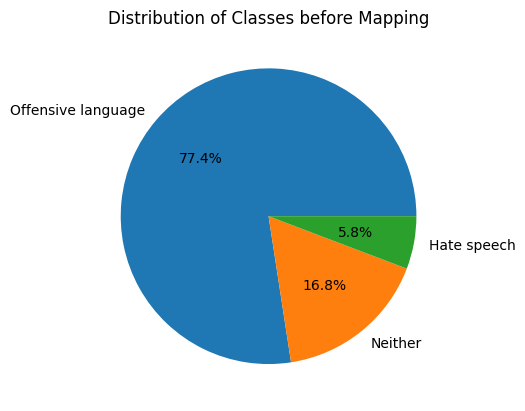

- **To focus more on Hate speech detection, we mapped offensive and hate speech to the same class:**:
  - 0: Hate speech
  - 1: Not Hate speech
  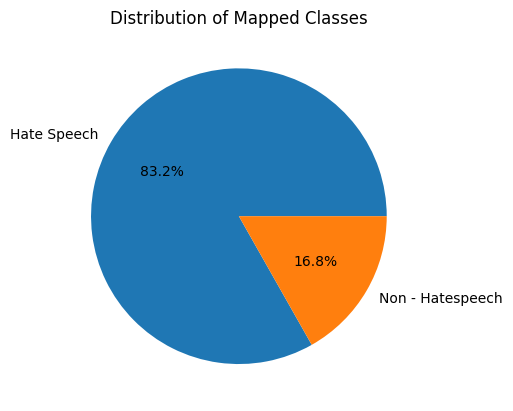
  

### Train and Test Data Split
- **Train Data Size**: 19,826 samples
- **Test Data Size**: 4,957 samples
- **Split Ratio**: 80% train, 20% test
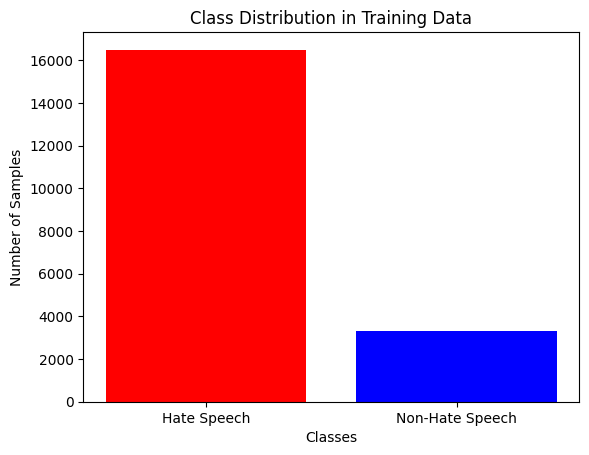

In [10]:
import re
import string
import joblib
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [11]:
class ReduceMeanLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.reduce_mean(inputs, axis=1)

### Load the Tokenizer and the model

### Tokenization
- **Keras Tokenizer**: Converts text into sequences of integers suitable for model input.
### Embedding
- **GloVe (Global Vectors for Word Representation)**: Selected for its ability to capture semantic meanings and relationships between words.


In [12]:
#load tokenizer and model
tokenizer_save_path = 'tokenizer.joblib'
model_save_path = 'best_lstm_model.keras'

## Model Loaded : LSTM with Activation

In [13]:
tokenizer = joblib.load(tokenizer_save_path)
model = load_model(model_save_path, custom_objects={'ReduceMeanLayer': ReduceMeanLayer})

## Data Preprocessing
We performed several data preprocessing steps to clean and prepare the text data:
- Removed usernames, sequences, URLs
- Converted to lowercase
- Removed punctuations
- Replaced words (abbreviations, misspellings)
- Removed stopwords
- Lemmatization


In [14]:
# Function to preprocess the input text
def preprocess_text(text, tokenizer, max_length=100):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+|@\w+|#\w+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'\b\d+\b', '', text)
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([WordNetLemmatizer().lemmatize(word) for word in text.split() if word not in stopwords.words('english')])
    
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=max_length)
    
    return padded_seq

In [15]:
#function to make predictions
def predict_text(text):
    processed_text = preprocess_text(text, tokenizer)
    prediction = model.predict(processed_text)
    predicted_label = np.argmax(prediction, axis=1)[0]
    return 'Non Hate Speech' if predicted_label == 1 else 'Hate Speech'

### Function to take input and Print Prediction

In [18]:
for i in range(0, 5):
    input_text = str(input("Enter the text to predict: "))
    print(f"Input text {i + 1}: {input_text}")
    prediction = predict_text(input_text)
    print(f"The input text is classified as: {prediction}\n")

Input text 1: he moviwatche is literraly shit, dont watch this fckkngg%^%^% movie
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The input text is classified as: Hate Speech

Input text 2: i dont like that black nigga
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The input text is classified as: Hate Speech

Input text 3: movie for me was below average , although some might like it
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The input text is classified as: Non Hate Speech

Input text 4: nice , i love it
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The input text is classified as: Non Hate Speech

Input text 5: this movie is very gooooood
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The input text is classified as: Non Hate Speech



## Evaluation
We evaluated our model using the following metrics:
- **Accuracy**: Overall correctness of the model.
- **F1 Score**: Balanced measure of precision and recall.
- **Confusion Matrix**: Detailed breakdown of model performance.
### Best Scores Achieved
- **Accuracy**: 91.04%
- **F1 Score**: 91.65%

## Classification Report

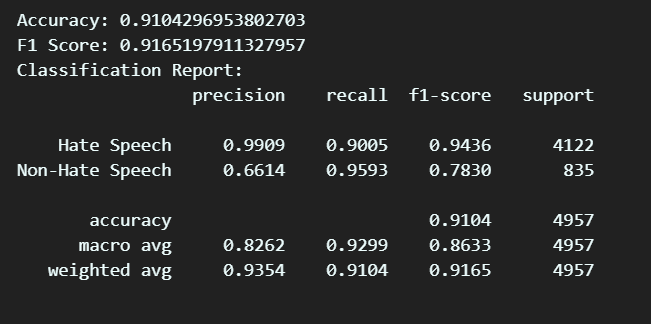

# Confusion Matrix

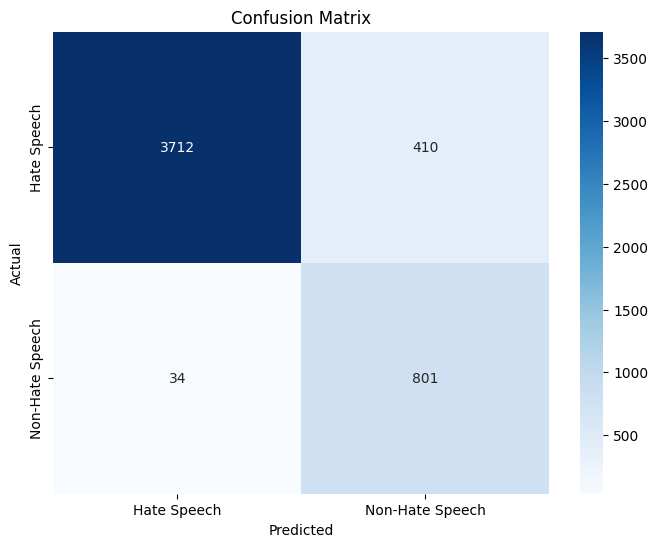